<a href="https://colab.research.google.com/github/DamodaraBarbosa/eleicoes_ceara_2022/blob/main/05_data_analysis_eleicoes_ceara_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
!pip install geopandas geobr descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importando as bibliotecas

In [49]:
import pandas as pd
import numpy as np
import geopandas as gpd
from geobr import read_municipality
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# 1. Carregando os dados no *dataframe*

In [3]:
votacao_ce = pd.read_csv(
    '/content/drive/MyDrive/Datasets/votacao_secao_2022_CE_tratado.csv',
    sep= ',', encoding= 'latin-1'
)

In [4]:
votacao_ce.head(3)

,nm_municipio,nr_zona,nr_secao,ds_cargo,nr_votavel,nm_votavel,qt_votos
0,FORTALEZA,94,6,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,4
1,RUSSAS,9,266,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,13
2,PARAIPABA,109,119,DEPUTADO FEDERAL,4444,HEITOR RODRIGO PEREIRA FREIRE,3


# 2. Informações do *dataframe*

## 2.1 Dimensões do *dataframe*

Definir as dimensões de um *dataframe* é indicar o número de colunas e linhas do mesmo. 

In [5]:
f'O dataframe contém {votacao_ce.shape[1]} colunas e {votacao_ce.shape[0]} linhas.'

'O dataframe contém 7 colunas e 2509903 linhas.'

## 2.2 Infos do *dataframe*

In [6]:
votacao_ce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509903 entries, 0 to 2509902
Data columns (total 7 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   nm_municipio  object
 1   nr_zona       int64 
 2   nr_secao      int64 
 3   ds_cargo      object
 4   nr_votavel    int64 
 5   nm_votavel    object
 6   qt_votos      int64 
dtypes: int64(4), object(3)
memory usage: 134.0+ MB


## 2.3 Dados faltantes

É importante identificar a presença de dados faltantes ("not a number" ou `NaN`).

In [7]:
votacao_ce.isna().sum()

nm_municipio    0
nr_zona         0
nr_secao        0
ds_cargo        0
nr_votavel      0
nm_votavel      0
qt_votos        0
dtype: int64

Não há em nenhuma das colunas do conjunto de dados a presença de dados faltantes.

## 2.4 Presença de dados duplicados

Para integridade dos dados também é importante detectar se há dados duplicados. Para isso:

In [8]:
votacao_ce.loc[votacao_ce.duplicated()]

,nm_municipio,nr_zona,nr_secao,ds_cargo,nr_votavel,nm_votavel,qt_votos


Não há dados duplicados no conjunto de dados.

# 3. Tratamento dos dados

In [9]:
votacao_ce['nr_zona'] = votacao_ce['nr_zona'].astype(str)
votacao_ce['nr_secao'] = votacao_ce['nr_secao'].astype(str)

In [10]:
votacao_ce.dtypes

nm_municipio    object
nr_zona         object
nr_secao        object
ds_cargo        object
nr_votavel       int64
nm_votavel      object
qt_votos         int64
dtype: object

# 4. Análise exploratória dos dados

## 4.1 Coluna `nm_municipio`

### 4.1.1 Número de municípios cearenses

In [11]:
f"Há {votacao_ce['nm_municipio'].nunique()} diferentes municípios cearenses na base de dados."

'Há 184 diferentes municípios cearenses na base de dados.'

### 4.1.2 Frequência dos municípios na base de dados

Por serem 184 municípios na base de dados, é adequado reduzir o escopo da análise. Opta-se por analisar apenas os 20 municípios com maiores e menores frequências. 

* Tabela com a frequência absoluta e percentual:

In [12]:
pd.DataFrame(
    {'Frequência absoluta': votacao_ce.value_counts('nm_municipio', ascending= False).head(20),
    'Percentual': round(votacao_ce.value_counts('nm_municipio', ascending= False, normalize= True).head(20) * 100, 2)}
)

,Frequência absoluta,Percentual
nm_municipio,,
FORTALEZA,951899,37.93
CAUCAIA,102428,4.08
JUAZEIRO DO NORTE,73565,2.93
MARACANAÚ,70845,2.82
SOBRAL,48304,1.92
CRATO,33408,1.33
ITAPIPOCA,31179,1.24
MARANGUAPE,29749,1.19
QUIXADÁ,22474,0.90


* Análise gráfica da distribuição dos municípios cearenses:

In [13]:
fig = px.bar(
    x= votacao_ce.value_counts('nm_municipio', ascending= True).tail(20).values,
    y= votacao_ce.value_counts('nm_municipio', ascending= True).tail(20).keys(),
    title= 'Distribuição de frequência dos 20 municípios com maior distribuição de frequência na base de dados'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Municípios', xaxis_title= 'Frequência')
fig.show()

In [14]:
fig = px.bar(
    x= votacao_ce.value_counts('nm_municipio', ascending= False).tail(20).values,
    y= votacao_ce.value_counts('nm_municipio', ascending= False).tail(20).keys(),
    title= 'Distribuição de frequência dos 20 municípios com menor distribuição de frequência na base de dados',
    color_discrete_sequence= ['red']
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Municípios', xaxis_title= 'Frequência')
fig.show()

O município de Fortaleza, capital do Ceará, é o município com maior distribuição de frequência na base de dados. Sendo mais de nove vezes maior do que Caucaia, o segundo município com mais aparições.

## 4.2 Coluna `nr_zona`

### 4.2.1 Número de zonas no estado do Ceará

In [15]:
f" Ao todo há {votacao_ce['nr_zona'].nunique()} diferentes zonas no estado do Ceará."

' Ao todo há 109 diferentes zonas no estado do Ceará.'

### 3.2.2 Número de zonas por cidade do estado

* Tabela com o número de zonas por município:

In [16]:
zonas_por_municipio = pd.DataFrame({'Nº de zonas': votacao_ce.groupby('nm_municipio')['nr_zona'].nunique().sort_values(ascending= False).head(10)})
zonas_por_municipio

,Nº de zonas
nm_municipio,
FORTALEZA,17
CAUCAIA,3
SOBRAL,2
JUAZEIRO DO NORTE,2
MARACANAÚ,2
ABAIARA,1
PACAJUS,1
MUCAMBO,1
MULUNGU,1


Fortaleza, Caucaia, Sobral, Juazeiro do Norte e Maracanaú são os únicos municípios do Ceará com mais de uma zona eleitora. A capital se destaca com 17 zonas eleitorais. Os demais municípios do estado possuem apenas 1 zona eleitoral.

In [17]:
fig = px.bar(
    data_frame= zonas_por_municipio,
    x= 'Nº de zonas',
    title= 'Os municípios cearenses com mais zonas eleitorais'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Município', yaxis= dict(autorange= 'reversed')) # inverte a ordem dos dados no eixo y
fig.show()

### 4.2.3 Número de eleitores por zona eleitoral

Selecionam-se apenas os dados referentes a um dos cargos disputados. Os dados são agrupados em `nr_zona` e `ds_cargo`. Somam-se os votos por zona e a tabela é ordenada para que apareçam as vinte zonas com mais votos.

In [18]:
eleitores_por_zona_eleitoral = votacao_ce.query('ds_cargo == "GOVERNADOR"')\
                                 .groupby(['nr_zona', 'ds_cargo'])['qt_votos']\
                                 .sum().sort_values(ascending= False)\
                                 .head(20).to_frame()

Os *index* da tabela agrupada são resetados e a coluna `ds_cargo`, que contém o mesmo cargo, é eliminada.

In [19]:
eleitores_por_zona_eleitoral = eleitores_por_zona_eleitoral.reset_index()\
                                                           .drop('ds_cargo', axis= 1)

O nome `qt_votos` para coluna da tabela não faz sentido, pois motra, na realidade, o número de eleitores por zona eleitoral. Portanto, a coluna passa a ser `eleitores`.

In [20]:
eleitores_por_zona_eleitoral = eleitores_por_zona_eleitoral.rename({'qt_votos': 'eleitores'}, axis= 1)

In [21]:
eleitores_por_zona_eleitoral.dtypes

nr_zona      object
eleitores     int64
dtype: object

In [22]:
fig = px.bar(
    data_frame= eleitores_por_zona_eleitoral,
    y= 'nr_zona',
    x= 'eleitores',
    title= 'As 20 zonas eleitorais com mais eleitores no Ceará'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Nº da zona eleitoral', xaxis_title= 'Quantidade de eleitores', yaxis= dict(autorange= 'reversed'))
fig.show()

#### 4.2.3.1 Municípios em que se encontram as zonas eleitorais com mais eleitores

In [23]:
zonas_eleitorais = eleitores_por_zona_eleitoral['nr_zona']

A coluna `nr_zona` do *dataframe* `eleitores_por_zona_eleitoral` é armazenada numa nova variável. 

Quando os valores são consultados na base de dados, tem-se os municípios:

In [24]:
votacao_ce.query('nr_zona in @zonas_eleitorais')['nm_municipio'].unique()

array(['FORTALEZA', 'ITAPIPOCA', 'IGUATU', 'QUIXELÔ', 'JUAZEIRO DO NORTE',
       'SOBRAL', 'TURURU', 'CEDRO', 'ALCÂNTARAS', 'MERUOCA', 'JARDIM'],
      dtype=object)

## 4.3 Coluna `nr_secao`

### 4.3.1 Número de seções na base de dados

In [25]:
f"Há {votacao_ce['nr_secao'].nunique()} diferentes seções na base de dados."

'Há 938 diferentes seções na base de dados.'

### 4.3.2 Número de seções por cidade do estado

#### 4.3.2.1 As cidades do estado com mais seções eleitorais

As cidades do estado do Ceará com mais seções eleitorais são:


In [26]:
cidades_mais_secoes = pd.DataFrame({'Nº de seções': votacao_ce.groupby('nm_municipio')['nr_secao'].nunique().sort_values(ascending= False).head(20)})
cidades_mais_secoes

,Nº de seções
nm_municipio,
FORTALEZA,937
CAUCAIA,448
SOBRAL,430
JUAZEIRO DO NORTE,398
MARACANAÚ,386
ITAPIPOCA,336
CRATO,309
MARANGUAPE,278
IGUATU,258


In [27]:
fig = px.bar(
    data_frame= cidades_mais_secoes,
    x= 'Nº de seções',
    y= cidades_mais_secoes.index,
    title= 'As vinte cidades com mais seções eleitorais no Ceará' 
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Nome do município', yaxis= dict(autorange= 'reversed'))
fig.show()

#### 4.3.2.2 As cidades do estado com menos seções eleitorais

In [28]:
cidades_menos_secoes = pd.DataFrame({'Nº de seções': votacao_ce.groupby('nm_municipio')['nr_secao'].nunique().sort_values().head(20)})
cidades_menos_secoes

,Nº de seções
nm_municipio,
GRANJEIRO,20
POTIRETAMA,21
SENADOR SÁ,21
ERERÉ,21
GUARAMIRANGA,22
PACUJÁ,22
BAIXIO,23
ARNEIROZ,25
ITAIÇABA,25


In [29]:
fig = px.bar(
    data_frame= cidades_menos_secoes,
    x= 'Nº de seções',
    y= cidades_menos_secoes.index,
    color_discrete_sequence= ['red'],
    title= 'As vinte cidades com menos seções eleitorais no Ceará'
    
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Nome do município', yaxis= dict(autorange= 'reversed'))
fig.show()

### 4.3.3 Número de eleitores por seção eleitoral

Selecionam-se apenas os dados referentes a um dos cargos disputados. Os dados são agrupados em `nr_secao` e `ds_cargo`. Somam-se os votos por seção e a tabela é ordenada para que apareçam as vinte zonas com mais votos.

In [30]:
eleitores_por_secao_eleitoral = votacao_ce.query('ds_cargo == "GOVERNADOR"')\
                                  .groupby(['nr_secao', 'ds_cargo'])['qt_votos']\
                                  .sum().sort_values(ascending= False)\
                                  .head(20).to_frame()

Os *index* da tabela agrupada são resetados e a coluna `ds_cargo`, que contém o mesmo cargo, é eliminada.

In [31]:
eleitores_por_secao_eleitoral = eleitores_por_secao_eleitoral.reset_index()\
                                                             .drop('ds_cargo', axis= 1)

O nome `qt_votos` para coluna da tabela não faz sentido, pois motra, na realidade, o número de eleitores por zona eleitoral. Portanto, a coluna passa a ser `eleitores`.

In [32]:
eleitores_por_secao_eleitoral = eleitores_por_secao_eleitoral.rename({'qt_votos': 'eleitores'}, axis= 1)

In [33]:
fig = px.bar(
    data_frame= eleitores_por_secao_eleitoral,
    y= 'nr_secao',
    x= 'eleitores',
    title= 'As seções com mais eleitores no estado do Ceará'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Nº da seção', xaxis_title= 'Quantidade de eleitores', yaxis= dict(autorange= 'reversed'))
fig.show()

#### 4.3.3.1 Municípios em que se encontram as seções eleitorais com mais eleitores

In [34]:
secoes_eleitorais = eleitores_por_secao_eleitoral['nr_secao']

Quando os valores são consultados na base de dados, tem-se os municípios:

In [35]:
votacao_ce.query('nr_secao in @secoes_eleitorais')['nm_municipio'].unique()

array(['ITAPIPOCA', 'PEDRA BRANCA', 'TIANGUÁ', 'MARANGUAPE', 'FORTALEZA',
       'QUIXERAMOBIM', 'LAVRAS DA MANGABEIRA', 'ANTONINA DO NORTE',
       'CAMOCIM', 'MISSÃO VELHA', 'AQUIRAZ', 'UBAJARA', 'JAGUARETAMA',
       'IGUATU', 'ICÓ', 'BREJO SANTO', 'CASCAVEL', 'MASSAPÊ',
       'ALCÂNTARAS', 'MARACANAÚ', 'CARIRÉ', 'SOBRAL', 'IPU',
       'JUAZEIRO DO NORTE', 'COREAÚ', 'TAUÁ', 'BARBALHA', 'ALTANEIRA',
       'BEBERIBE', 'BAIXIO', 'IBIAPINA', 'PACAJUS', 'CAUCAIA', 'ARARIPE',
       'APUIARÉS', 'GUARACIABA DO NORTE', 'ITAPAJÉ', 'CRATO', 'CARIDADE',
       'PARACURU', 'MILAGRES', 'ARACOIABA', 'MORADA NOVA', 'CAMPOS SALES',
       'BATURITÉ', 'IBARETAMA', 'SANTANA DO CARIRI', 'ARACATI',
       'IPUEIRAS', 'IPAUMIRIM', 'RERIUTABA', 'PACATUBA',
       'SÃO GONÇALO DO AMARANTE', 'NOVA RUSSAS', 'TAMBORIL', 'AMONTADA',
       'QUITERIANÓPOLIS', 'TRAIRI', 'ACARAPE', 'CRUZ', 'QUIXADÁ',
       'RUSSAS', 'ERERÉ', 'LIMOEIRO DO NORTE', 'REDENÇÃO', 'AIUABA',
       'CRATEÚS', 'JAGUARUANA', 'ARATUBA'

## 4.4 Coluna `ds_cargo`

Os cargos eleitorais presentes na base de dados são:

In [36]:
votacao_ce['ds_cargo'].unique()

array(['DEPUTADO FEDERAL', 'DEPUTADO ESTADUAL', 'SENADOR', 'GOVERNADOR'],
      dtype=object)

## 4.5 Coluna `nm_votavel`

O número de candidatos, independente dos cargos, em toda a base de dados:

In [37]:
f"A base de dados contém {votacao_ce['nm_votavel'].nunique()} candidatos diferentes."

'A base de dados contém 928 candidatos diferentes.'

# 5. Análise eleitoral

## 5.1 Cargo governador

### 5.1.1 Número de votos por candidato ao governo do estado do Ceará

In [38]:
votos_governador = votacao_ce.query('ds_cargo == "GOVERNADOR"').groupby('nm_votavel')['qt_votos'].sum().sort_values(ascending= False).to_frame()
votos_governador

,qt_votos
nm_votavel,
ELMANO DE FREITAS DA COSTA,2808300
WAGNER SOUSA GOMES,1649213
ROBERTO CLÁUDIO RODRIGUES BEZERRA,734976
VOTO NULO,249099
VOTO BRANCO,175459
FRANCISCO RAIMUNDO MALTA DE ARAÚJO,3015
SERLEY DE SOUSA LEAL,1881
JOSÉ BATISTA NETO,1507


In [39]:
fig = px.bar(
    data_frame= votos_governador,
    y= votos_governador.index,
    x= 'qt_votos',
    color= votos_governador.index,
    title= 'Votos totais por candidato ao cargo de governador do Ceará',
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Candidatos', xaxis_title= 'Quantidade de votos', legend_title= 'Candidatos')
fig.show()

### 5.1.2 Porcentagem de votos totais e válidos ao governo do estado

O número de votos totais de votos para o cargo de governador:

In [40]:
numero_votos_totais = votacao_ce.query('ds_cargo == "GOVERNADOR"')['qt_votos'].sum()
print(f'Votos totais: {numero_votos_totais}')

Votos totais: 5623450


E para determinar o número de votos válidos basta excluir os votos nulos e brancos:

In [41]:
votos_validos = votacao_ce.query('nm_votavel != "VOTO NULO" and nm_votavel != "VOTO BRANCO"')

In [42]:
numero_votos_validos = votos_validos.query('ds_cargo == "GOVERNADOR"')['qt_votos'].sum()
print(f'Votos válidos: {numero_votos_validos}')

Votos válidos: 5198892


A porcentagem é calculada e mostrada na tabela abaixo:

In [43]:
porcentagem_votos_governadores = pd.DataFrame(
    {'Votos válidos':round((votos_validos.query('ds_cargo == "GOVERNADOR"').groupby('nm_votavel')['qt_votos'].sum()/numero_votos_validos) * 100, 2),
     'Votos totais': round((votacao_ce.query('ds_cargo == "GOVERNADOR"').groupby('nm_votavel')['qt_votos'].sum()/numero_votos_totais) * 100, 2)}
)

In [44]:
porcentagem_votos_governadores = porcentagem_votos_governadores.transpose()
porcentagem_votos_governadores

nm_votavel,ELMANO DE FREITAS DA COSTA,FRANCISCO RAIMUNDO MALTA DE ARAÚJO,JOSÉ BATISTA NETO,ROBERTO CLÁUDIO RODRIGUES BEZERRA,SERLEY DE SOUSA LEAL,VOTO BRANCO,VOTO NULO,WAGNER SOUSA GOMES
Votos válidos,54.02,0.06,0.03,14.14,0.04,NaN,NaN,31.72
Votos totais,49.94,0.05,0.03,13.07,0.03,3.12,4.43,29.33


Por fim, o gráfico mostra a comparação entre os votos totais e válidos.

In [45]:
fig = px.bar(
    data_frame= porcentagem_votos_governadores,
    y= porcentagem_votos_governadores.index,
    x= porcentagem_votos_governadores.columns,
    title= 'Porcentagem de votos totais e válidos para o cargo de governador do Ceará'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= '', xaxis_title= 'Porcentagem dos votos', legend_title= 'Candidatos')
fig.show()

## 5.2 Votos para o cargo de governador por município cearense

### 5.2.1 Contribuição de cada município para o panorama geral de votos no estado

Calcula-se o quanto o número de votos no município representa em relação ao total de votos no estado do Ceará. E depois tal valor é convertido em porcentagem:

In [46]:
votos_municipio_pelo_total = votacao_ce.query('ds_cargo == "GOVERNADOR"').groupby('nm_municipio')['qt_votos'].sum()/numero_votos_totais
# selecionam-se os dados referentes aos votos em governador, são agrupados por município e somados.
votos_porcentagem_municipio = round(votos_municipio_pelo_total * 100, 2) # os valores são convertidos em porcentagem.

In [47]:
votos_porcentagem_municipio = pd.DataFrame(votos_porcentagem_municipio.sort_values(ascending= False)) # ordenam-se os dados do maior para o menor.
votos_porcentagem_municipio.head()

,qt_votos
nm_municipio,
FORTALEZA,27.74
CAUCAIA,3.61
JUAZEIRO DO NORTE,2.75
MARACANAÚ,2.64
SOBRAL,2.23


In [50]:
fig = go.Figure()
fig.add_trace(
    go.Waterfall(x= votos_porcentagem_municipio.index, y= votos_porcentagem_municipio['qt_votos'])
)
fig.update_layout(
    title= 'Contribuição de votos, em porcentagem, dos municípios no panorama geral da votação para governador do Ceará',
    title_x= 0.5, yaxis_title= 'Porcentagem', xaxis_title= 'Municípios'
)
fig.show()

Fortaleza, capital do estado, sozinha corresponde a mais de um quarto dos votos (27,74%) e é seguida por outras cidades importantes como Caucaia (3,61%), Juazeiro do Norte (2,75%), Maracanaú (2,64%) e Sobral (2,23%).

### 5.2.2 Quantidade de municípios em que os candidatos venceram 

Selecionam-se os dados referentes ao cargo de governador e agrupam-se esses dados pelo município e nome do candidato. Os votos são, então, somados e o *index* transformado em colunas.

In [51]:
votos_candidatos_por_municipio = votacao_ce.query('ds_cargo == "GOVERNADOR"')\
                                           .groupby(['nm_municipio', 'nm_votavel'])\
                                           ['qt_votos'].sum().reset_index()

Ordenam-se os dados em ordem alfabética no caso das cidades e de quem obteve mais votos para menos votos.

In [52]:
votos_candidatos_por_municipio = votos_candidatos_por_municipio.sort_values(['nm_municipio', 'qt_votos'], ascending= [True, False])

Agrupa-se novavente os dados por município, selecionando apenas o primeiro candidato, que é o mais votado.

In [53]:
vencedores_por_municipio = votos_candidatos_por_municipio.groupby('nm_municipio').head(1)

In [54]:
vencedores_por_municipio.head()

,nm_municipio,nm_votavel,qt_votos
0,ABAIARA,ELMANO DE FREITAS DA COSTA,4182
8,ACARAPE,ELMANO DE FREITAS DA COSTA,4652
15,ACARAÚ,ELMANO DE FREITAS DA COSTA,20534
23,ACOPIARA,ELMANO DE FREITAS DA COSTA,18015
31,AIUABA,ELMANO DE FREITAS DA COSTA,4052


In [55]:
fig = px.histogram(
    data_frame= vencedores_por_municipio,
    y= 'nm_votavel', color= 'nm_votavel',
    title= 'Quantidade de municípios cearenses em que cada candidato saiu vencedor'
)
fig.update_layout(title= {'x': 0.5}, yaxis_title= 'Candidatos', xaxis_title= 'Número de cidades', legend_title= 'Candidatos')
fig.show()

O candidato Elmano de Freitas saiu vencedor em 178 cidades cearenses. Enquanto os candidatos Wagner Gomes e Roberto Claúdio só saíram vencedores em 5 e 3 cidades, respectivamente.

#### 5.2.2.1 Cidades em que o candidato Wagner Sousa Gomes venceu

In [56]:
vencedores_por_municipio.query('nm_votavel == "WAGNER SOUSA GOMES"')

,nm_municipio,nm_votavel,qt_votos
431,EUSÉBIO,WAGNER SOUSA GOMES,18787
455,FORTALEZA,WAGNER SOUSA GOMES,602050
820,MARCO,WAGNER SOUSA GOMES,8170
920,MORRINHOS,WAGNER SOUSA GOMES,6503
1274,SÃO GONÇALO DO AMARANTE,WAGNER SOUSA GOMES,16630


#### 5.2.2.2 Cidades em que o candidato Roberto Claúdio venceu

In [57]:
vencedores_por_municipio.query('nm_votavel == "ROBERTO CLÁUDIO RODRIGUES BEZERRA"')

,nm_municipio,nm_votavel,qt_votos
1096,PIRES FERREIRA,ROBERTO CLÁUDIO RODRIGUES BEZERRA,2644


#### 5.2.2.3 Visualização no mapa do estado

In [146]:
ceara_gpd = read_municipality(code_muni= 23, year= 2020)

ceara_gpd['name_muni'] = ceara_gpd['name_muni'].str.upper()

ceara_gpd['code_muni'] = ceara_gpd['code_muni'].astype(int)

ceara_gpd.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,2300101,ABAIARA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ..."
1,2300150,ACARAPE,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-38.65304 -4.15796, -38.65108 ..."
2,2300200,ACARAÚ,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.30984 -2.80769, -40.26882 ..."
3,2300309,ACOPIARA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.15631 -5.95731, -39.15267 ..."
4,2300408,AIUABA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.11801 -6.34845, -40.11298 ..."


In [147]:
vencedores_por_municipio = pd.merge(
    left= ceara_gpd[['code_muni', 'name_muni', 'geometry']], right= vencedores_por_municipio, 
    how= 'inner', left_on= 'name_muni', right_on= 'nm_municipio'
).drop('name_muni', axis= 1)

In [150]:
vencedores_por_municipio

,code_muni,geometry,nm_municipio,nm_votavel,qt_votos,id
0,2300101,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ...",ABAIARA,ELMANO DE FREITAS DA COSTA,4182,2300101
1,2300150,"MULTIPOLYGON (((-38.65304 -4.15796, -38.65108 ...",ACARAPE,ELMANO DE FREITAS DA COSTA,4652,2300150
2,2300200,"MULTIPOLYGON (((-40.30984 -2.80769, -40.26882 ...",ACARAÚ,ELMANO DE FREITAS DA COSTA,20534,2300200
3,2300309,"MULTIPOLYGON (((-39.15631 -5.95731, -39.15267 ...",ACOPIARA,ELMANO DE FREITAS DA COSTA,18015,2300309
4,2300408,"MULTIPOLYGON (((-40.11801 -6.34845, -40.11298 ...",AIUABA,ELMANO DE FREITAS DA COSTA,4052,2300408
...,...,...,...,...,...,...
179,2313807,"MULTIPOLYGON (((-39.43097 -3.62271, -39.42050 ...",URUBURETAMA,ELMANO DE FREITAS DA COSTA,9379,2313807
180,2313906,"MULTIPOLYGON (((-40.79438 -3.21804, -40.66906 ...",URUOCA,ELMANO DE FREITAS DA COSTA,6203,2313906
181,2313955,"MULTIPOLYGON (((-40.43291 -4.14007, -40.42945 ...",VARJOTA,ELMANO DE FREITAS DA COSTA,5429,2313955
182,2314003,"MULTIPOLYGON (((-39.23833 -6.58392, -39.23595 ...",VÁRZEA ALEGRE,ELMANO DE FREITAS DA COSTA,17365,2314003


/usr/local/lib/python3.9/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/usr/local/lib/python3.9/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.



Text(0.5, 1.0, 'Candidatos ao governo do estado vencedores em cada município')

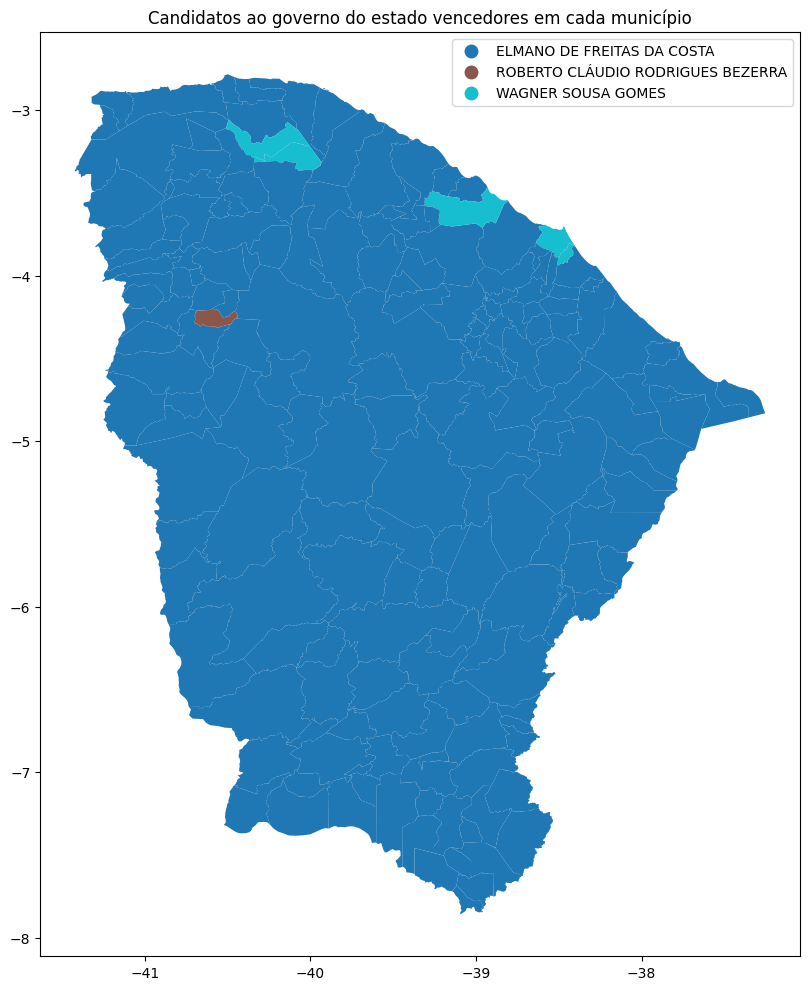

In [178]:
ax = vencedores_por_municipio.plot(
    column= 'nm_votavel', 
    legend= True, figsize= (18, 12)
)
ax.set_title('Candidatos ao governo do estado vencedores em cada município')

## 5.2.3 Votos para governador nos municípios da Região Metropolitana de Fortaleza 

A Região Metropolitana de Fortaleza é constituída de 19 municípios sendo eles:

* Aquiraz, Cascavel, Caucaia, Chorozinho, Eusébio, Fortaleza, Guaiúba, Horizonte, Itaitinga, Maracanaú, Maranguape, Pacajus, Pacatuba, Pindoretama, São Gonçalo do Amarante, São Luís do Curu, Paraipaba, Paracuru e Trairi. 

Fonte: https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_de_Fortaleza


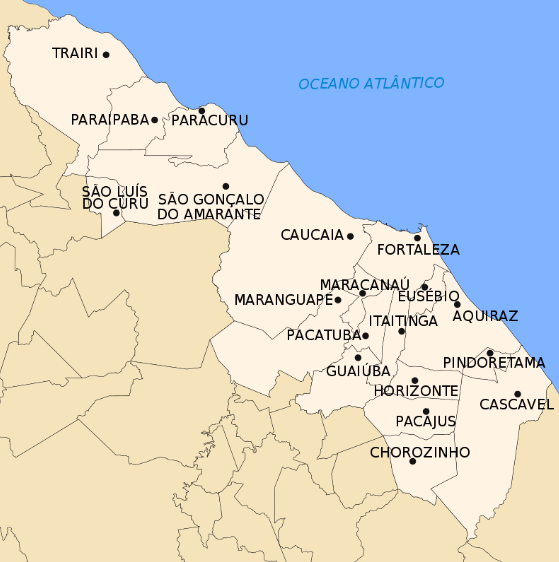

Instancia-se uma lista contendo o nome dos municípios da região metropolitana, todos eles em caixa alta:

In [75]:
regiao_metropolitana = [
    'AQUIRAZ', 'CASCAVEL', 'CAUCAIA', 'CHOROZINHO', 'EUSÉBIO', 
    'FORTALEZA', 'GUAIÚBA', 'HORIZONTE', 'ITAITINGA', 'MARACANAÚ', 
    'MARANGUAPE', 'PACAJUS', 'PACATUBA', 'PINDORETAMA', 
    'SÃO GONÇALO DO AMARANTE', 'SÃO LUÍS DO CURU',
    'PARAIPABA', 'PARACURU', 'TRAIRI'
]

Determina-se a quantidade de votos totais para governador em cada cidade da região metropolitana.

In [76]:
# Buscam-se os dados referentes a votação para governador e nos municípios da região metropolitana:

votos_por_cidade_regiao_metropolitana = votacao_ce.query('ds_cargo == "GOVERNADOR" and nm_municipio in @regiao_metropolitana')\
                                                  .groupby('nm_municipio')['qt_votos'].sum() # os dados são agrupados por município e os votos somados.
votos_por_cidade_regiao_metropolitana = dict(votos_por_cidade_regiao_metropolitana) 

Instanciou-se os votos por cidade da região metropolitana em um dicionário, como visualizado abaixo:

In [77]:
votos_por_cidade_regiao_metropolitana

{'AQUIRAZ': 52826,
 'CASCAVEL': 48165,
 'CAUCAIA': 203023,
 'CHOROZINHO': 14627,
 'EUSÉBIO': 42417,
 'FORTALEZA': 1559702,
 'GUAIÚBA': 16756,
 'HORIZONTE': 48963,
 'ITAITINGA': 25942,
 'MARACANAÚ': 148636,
 'MARANGUAPE': 68296,
 'PACAJUS': 44337,
 'PACATUBA': 44772,
 'PARACURU': 26088,
 'PARAIPABA': 21824,
 'PINDORETAMA': 15837,
 'SÃO GONÇALO DO AMARANTE': 38834,
 'SÃO LUÍS DO CURU': 9330,
 'TRAIRI': 37895}

Determinam-se os votos para cada candidato em cada um dos municípios da região metropolitana de Fortaleza.

In [78]:
# Buscam-se os dados referentes ao cargo de governador e das cidades da região metropolitana, estes são agrupados, os votos somados e os index resetados:

votos_regiao_metropolitana = votacao_ce.query('nm_municipio in @regiao_metropolitana and ds_cargo == "GOVERNADOR"')\
                                       .groupby(['nm_municipio', 'nm_votavel'])['qt_votos'].sum().reset_index()

# Os dados são ordenados em ordem alfabética do nome dos municípios e em ordem decrescente dos votos:

votos_regiao_metropolitana = votos_regiao_metropolitana.sort_values(['nm_municipio', 'qt_votos'], ascending= [True, False])

E, por fim, adicionam-se as porcentagens de votos para cada candidato naquela localidade:

In [79]:
porcentagem = list()

for index, row in votos_regiao_metropolitana.iterrows():
  # itera-se o dataframe e calcula-se a porcentagem dos votos a partir dos votos totais de cada município, informação presente no dicionário:

  valor = round((row['qt_votos'] / votos_por_cidade_regiao_metropolitana[row['nm_municipio']]) * 100, 2)
  porcentagem.append(valor) # os valores são colocados na lista porcentagem.

In [80]:
votos_regiao_metropolitana['porcentagem'] = porcentagem
votos_regiao_metropolitana

,nm_municipio,nm_votavel,qt_votos,porcentagem
0,AQUIRAZ,ELMANO DE FREITAS DA COSTA,25542,48.35
7,AQUIRAZ,WAGNER SOUSA GOMES,19229,36.40
3,AQUIRAZ,ROBERTO CLÁUDIO RODRIGUES BEZERRA,3721,7.04
6,AQUIRAZ,VOTO NULO,2643,5.00
5,AQUIRAZ,VOTO BRANCO,1643,3.11
...,...,...,...,...
150,TRAIRI,VOTO NULO,1768,4.67
149,TRAIRI,VOTO BRANCO,1259,3.32
145,TRAIRI,FRANCISCO RAIMUNDO MALTA DE ARAÚJO,11,0.03
146,TRAIRI,JOSÉ BATISTA NETO,9,0.02


O gráfico mostra a porcentagem dos votos para cada candidato (votos brancos e nulos inclusos) nos municípios da grande Fortaleza.

In [81]:
fig = px.bar(
    data_frame= votos_regiao_metropolitana,
    y= 'nm_municipio',
    x= 'porcentagem',
    color= 'nm_votavel',
    title= 'Porcentagem dos votos por candidato para cada município da região metropolitana de Fortaleza'
)
fig.update_layout(
    legend_title= 'Candidatos', yaxis_title= 'Municípios', xaxis_title= 'Porcentagem dos votos',
    yaxis= dict(autorange= 'reversed'), title= dict(x= 0.5)
)
fig.show()

### 5.2.3.1 Candidato vencedor por município da Região Metropolitana de Fortaleza

Para que o mapa da biblioteca *folium* cada candidato passa a ser representado por um valor numérico.

In [82]:
codigo_municipios_ceara.head(2)

,UF,Nome_UF,Região Geográfica Intermediária,Nome Região Geográfica Intermediária,Região Geográfica Imediata,Nome Região Geográfica Imediata,Mesorregião Geográfica,Nome_Mesorregião,Microrregião Geográfica,Nome_Microrregião,Município,Código Município Completo,Nome_Município
0,23,Ceará,2304,Juazeiro do Norte,230012,Brejo Santo,7,Sul Cearense,33,Brejo Santo,101,2300101,ABAIARA
1,23,Ceará,2301,Fortaleza,230003,Redenção-Acarape,2,Norte Cearense,13,Baturité,150,2300150,ACARAPE


In [83]:
# Instancia-se um dataframe que contém apenas o candidato vencedor no município.

vencedor_regiao_metropolitana = votos_regiao_metropolitana.groupby('nm_municipio').head(1)

# Utiliza-se a função lambda e define-se 1 para o candidato Elmano e 2 para o candidato Wagner:

vencedor_regiao_metropolitana['vencedor'] = vencedor_regiao_metropolitana['nm_votavel'].apply(
    lambda x: 1 if x == 'ELMANO DE FREITAS DA COSTA' else 2
)

# O 'merge' é feito a fim de adicionar a informação dos códigos dos municípios:

vencedor_regiao_metropolitana = pd.merge(
    left= vencedor_regiao_metropolitana, right= codigo_municipios_ceara[['Nome_Município', 'Código Município Completo']],
    how= 'left', left_on= 'nm_municipio', right_on= 'Nome_Município'
).drop('Nome_Município', axis= 1).rename({'Código Município Completo': 'codigo_municipio'}, axis= 1) # elimina-se uma coluna e renomeia-se outra coluna.

vencedor_regiao_metropolitana # visualiza-se o dataframe

<ipython-input-83-df28add1ea7e>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,nm_municipio,nm_votavel,qt_votos,porcentagem,vencedor,codigo_municipio
0,AQUIRAZ,ELMANO DE FREITAS DA COSTA,25542,48.35,1,2301000
1,CASCAVEL,ELMANO DE FREITAS DA COSTA,23131,48.02,1,2303501
2,CAUCAIA,ELMANO DE FREITAS DA COSTA,87636,43.17,1,2303709
3,CHOROZINHO,ELMANO DE FREITAS DA COSTA,8504,58.14,1,2303956
4,EUSÉBIO,WAGNER SOUSA GOMES,18787,44.29,2,2304285
5,FORTALEZA,WAGNER SOUSA GOMES,602050,38.60,2,2304400
6,GUAIÚBA,ELMANO DE FREITAS DA COSTA,10193,60.83,1,2304954
7,HORIZONTE,ELMANO DE FREITAS DA COSTA,21924,44.78,1,2305233
8,ITAITINGA,ELMANO DE FREITAS DA COSTA,12323,47.50,1,2306256
9,MARACANAÚ,ELMANO DE FREITAS DA COSTA,62335,41.94,1,2307650


In [84]:
m = folium.Map(
    location = [-5.2, -39.3],
    tiles= 'cartodbpositron',
    zoom_start= 7
)
folium.Choropleth(
    geo_data= ceara,
    data= vencedor_regiao_metropolitana,
    columns= ['codigo_municipio', 'vencedor'],
    key_on= 'feature.properties.id',
    fill_color= 'Paired',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Vencedores",
).add_to(m)
m

In [97]:
ceara_gpd = read_municipality(code_muni= 23, year= 2020)
ceara_gpd['name_muni'] = ceara_gpd['name_muni'].str.upper()
ceara_gpd

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,2300101.0,ABAIARA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.06727 -7.28001, -39.04954 ..."
1,2300150.0,ACARAPE,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-38.65304 -4.15796, -38.65108 ..."
2,2300200.0,ACARAÚ,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.30984 -2.80769, -40.26882 ..."
3,2300309.0,ACOPIARA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.15631 -5.95731, -39.15267 ..."
4,2300408.0,AIUABA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.11801 -6.34845, -40.11298 ..."
...,...,...,...,...,...,...,...,...
179,2313807.0,URUBURETAMA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.43097 -3.62271, -39.42050 ..."
180,2313906.0,URUOCA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.79438 -3.21804, -40.66906 ..."
181,2313955.0,VARJOTA,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-40.43291 -4.14007, -40.42945 ..."
182,2314003.0,VÁRZEA ALEGRE,23.0,CE,Ceará,2.0,Nordeste,"MULTIPOLYGON (((-39.23833 -6.58392, -39.23595 ..."


In [98]:
vencedor_regiao_metropolitana = pd.merge(
    left= vencedor_regiao_metropolitana, right= ceara_gpd[['name_muni', 'geometry']], how= 'inner',
    left_on= 'nm_municipio', right_on= 'name_muni'
)

In [104]:
vencedor_regiao_metropolitana_gpd = gpd.GeoDataFrame(vencedor_regiao_metropolitana, geometry= 'geometry', crs= 'EPSG:4326')
print(type(vencedor_regiao_metropolitana_gpd))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [131]:
cores = {'ELMANO DE FREITAS DA COSTA': 'Paired', 'WAGNER SOUSA GOMES': 'Paired'}

/usr/local/lib/python3.9/dist-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/usr/local/lib/python3.9/dist-packages/descartes/patch.py:62: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.



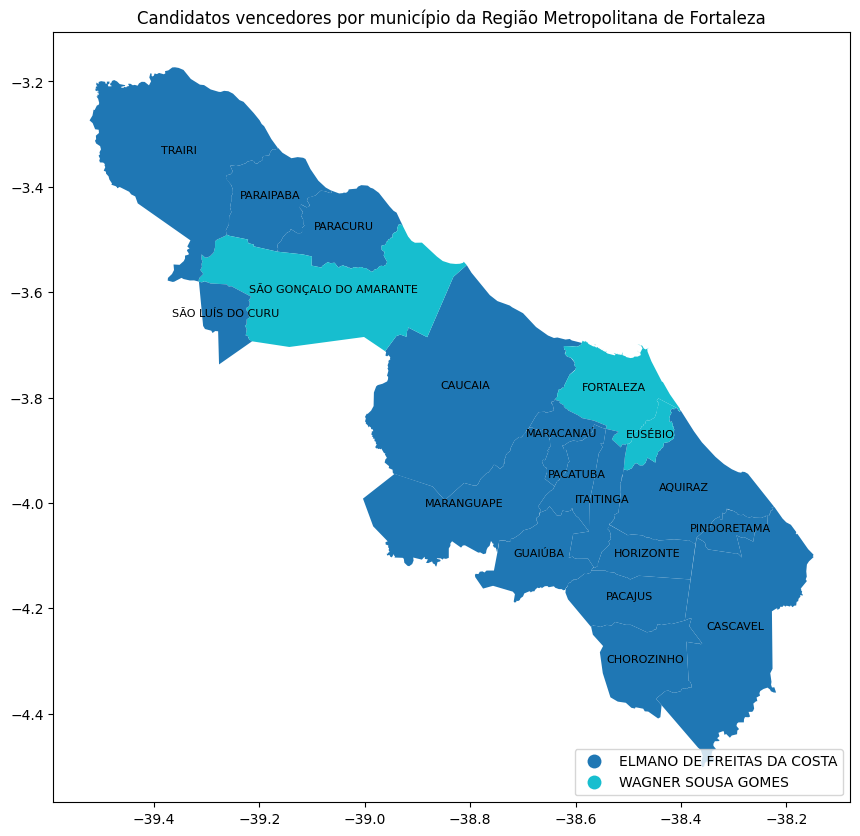

In [144]:
ax = vencedor_regiao_metropolitana_gpd.plot(
    'nm_votavel', categorical= True, legend= True, cmap= 'tab10', 
    legend_kwds= {'loc': 'lower right'}, figsize= (12, 10),
)
ax.set_title('Candidatos vencedores por município da Região Metropolitana de Fortaleza')

for i, row in vencedor_regiao_metropolitana_gpd.iterrows():
    ax.annotate(text=row['nm_municipio'], xy=row['geometry'].centroid.coords[0], ha='center', fontsize= 8)

plt.show()